# **MNIST - Categorical Classification**

> # **Convolutional Neural Network**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

- import TesorFlow

In [ ]:
import tensorflow

tensorflow.__version__

'2.5.0'

# **I. MNIST Data_Set Load**

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# **II. Data Preprocessing**

> ## **1) Reshape and Normalization**

- reshape

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))   # 3차원
X_test = X_test.reshape((10000, 28, 28, 1))     # 3차원

- Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## **2) One-Hot Encoding**

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **III. MNIST Keras Modeling**

> ## **1) Model Define**

- Feature Extraction Layer - <span style="color:orange">***CNN***</span>

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


- Classification Layer - <span style="color:orange">***DNN***</span>

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

> ## **2) Model Compile**

- 모델 학습 방법 설정

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

> ## **3) Model Fit**

- 약 5분

In [ ]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 12ms/step - loss: 0.2668 - accuracy: 0.9166 - val_loss: 0.0766 - val_accuracy: 0.9751
Epoch 2/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0476 - val_accuracy: 0.9860
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0479 - val_accuracy: 0.9870
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0431 - val_accuracy: 0.9869
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0411 - val_accuracy: 0.9884
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0431 - val_accuracy: 0.9882
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0397 - val_accuracy:

> ## **4) 학습 결과 시각화**

- Loss Visualization

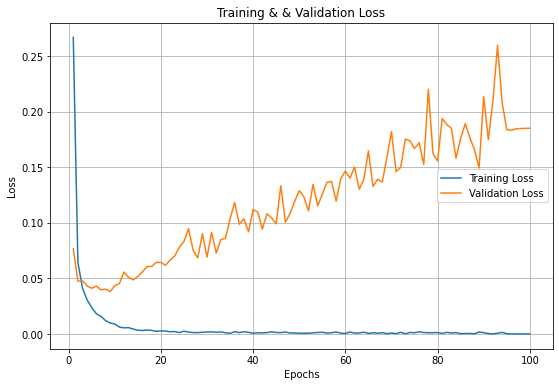

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt. figure(figsize=(9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## **5) Model Evaluate**

- Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.1283 - accuracy: 0.9936
Loss = 0.12826
Accuracy = 0.99360
